# ANÁLISIS EXPLORATORIO DE DATOS - MÓDULO 3

* **ALUMNO** : Rafael David
* **DATASET** : https://www.kaggle.com/datasets/raminhuseyn/dataset-from-tiktok
* **OBJETIVO** : Analizar Vistas vs Likes[texto del enlace](https://)

## VALIDACIÓN DE DATOS Y ANÁLISIS DE NULOS

### 1 - *IMPORTAR* LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2 - ESTABLECER APARIENCIA DE GRAFICOS

In [4]:
sns.set_style(style='whitegrid')

claim_color = {
    'claim':'#ff6602ff',
    'opinion':'#0f7175ff'
}

### 3 - CARGAR EL DATASET

In [3]:
df_tiktok = pd.read_csv('/content/tiktok_dataset.csv')
df_tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


### 4 - ANÁLISIS DE TIPOS DE DATOS

In [5]:
df_tiktok.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [6]:
df_tiktok.dtypes.value_counts()

,count
float64,5
object,4
int64,3


In [7]:
df_tiktok.shape

(19382, 12)

### 5 - ANÁLISIS DE VALORES NULOS

In [8]:
df_tiktok.isnull().any()

,0
#,False
claim_status,True
video_id,False
video_duration_sec,False
video_transcription_text,True
verified_status,False
author_ban_status,False
video_view_count,True
video_like_count,True
video_share_count,True


In [9]:
df_tiktok.isnull().sum().sort_values(ascending=False)

,0
claim_status,298
video_transcription_text,298
video_view_count,298
video_like_count,298
video_share_count,298
video_download_count,298
video_comment_count,298
#,0
video_id,0
video_duration_sec,0


In [10]:
plot_null_tiktok = df_tiktok.isnull().melt(value_name='missing')
plot_null_tiktok

,variable,missing
0,#,False
1,#,False
2,#,False
3,#,False
4,#,False
...,...,...
232579,video_comment_count,True
232580,video_comment_count,True
232581,video_comment_count,True
232582,video_comment_count,True


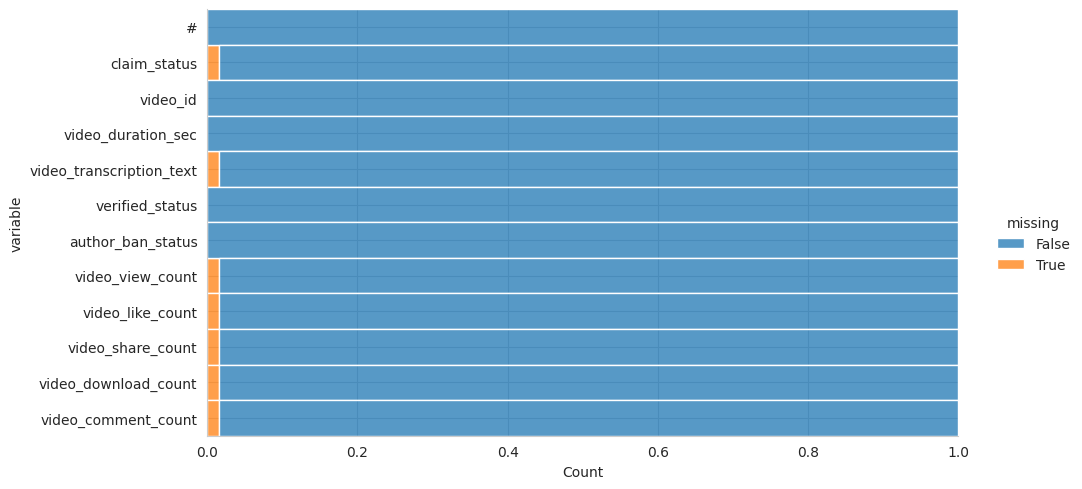

In [11]:
sns.displot(data=plot_null_tiktok,y='variable',hue='missing',aspect=2,multiple='fill')
plt.show()

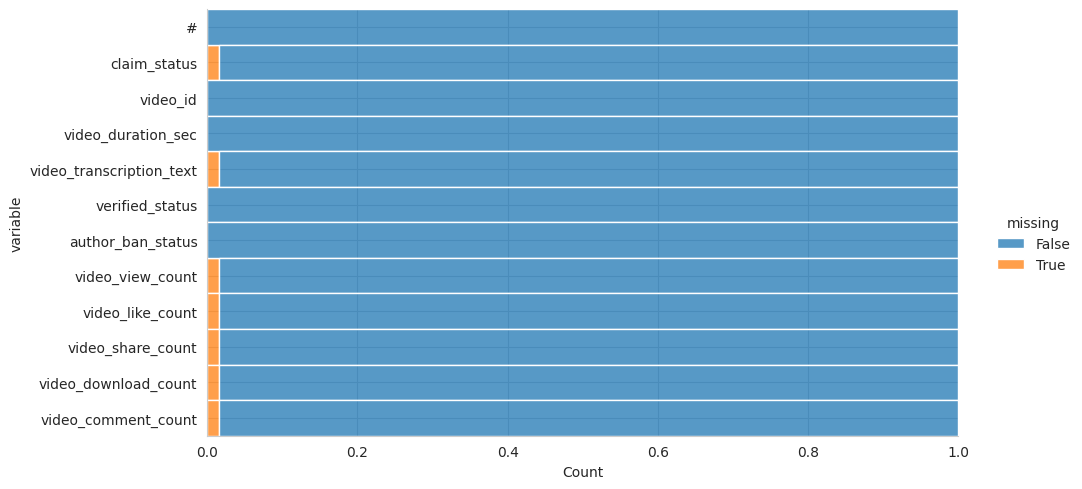

In [13]:
(
    df_tiktok
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )

    )
)
plt.show()

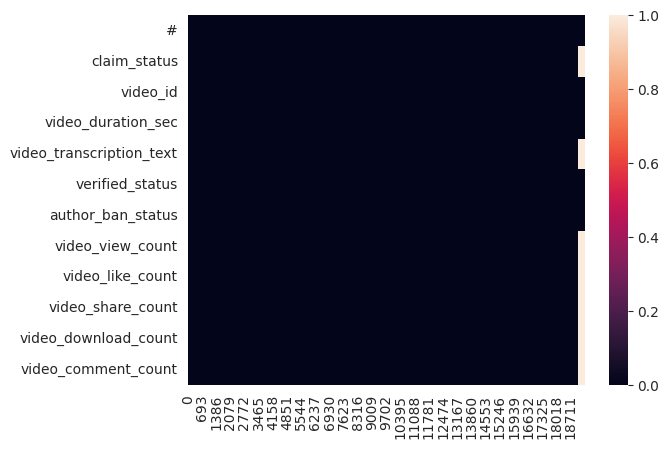

In [14]:
(
    df_tiktok
    .isnull()
    .transpose()
    .pipe(
        lambda df : sns.heatmap(data=df)
    )
)
plt.show()

In [15]:
int(df_tiktok.shape[0]) - int(df_tiktok.dropna().shape[0])

298

In [16]:
(int(df_tiktok.shape[0]) - int(df_tiktok.dropna().shape[0])) / int(df_tiktok.shape[0]) * 100

1.5375090289959756

In [17]:
df_tiktok = df_tiktok.dropna()
df_tiktok.shape

(19084, 12)

## ESTADÍSTICA DESCRIPTIVA

### 1 - MEDIDAS DE TENDENCIA CENTRAL

MEDIA

In [18]:
df_tiktok.mean(numeric_only=True)

,0
#,9.542500e+03
video_id,5.624840e+09
video_duration_sec,3.242381e+01
video_view_count,2.547086e+05
video_like_count,8.430464e+04
video_share_count,1.673525e+04
video_download_count,1.049430e+03
video_comment_count,3.493121e+02


MEDIANA

In [19]:
df_tiktok.median(numeric_only=True)

,0
#,9.542500e+03
video_id,5.609500e+09
video_duration_sec,3.200000e+01
video_view_count,9.954500e+03
video_like_count,3.403500e+03
video_share_count,7.170000e+02
video_download_count,4.600000e+01
video_comment_count,9.000000e+00


MODA

In [20]:
df_tiktok.mode(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,1234959018,6.0,2562.0,32.0,2.0,0.0,0.0
1,2,1235937767,NaN,7393.0,NaN,NaN,NaN,NaN
2,3,1236284548,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1236594147,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1237008133,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19079,19080,9999160062,NaN,NaN,NaN,NaN,NaN,NaN
19080,19081,9999298421,NaN,NaN,NaN,NaN,NaN,NaN
19081,19082,9999715467,NaN,NaN,NaN,NaN,NaN,NaN
19082,19083,9999834973,NaN,NaN,NaN,NaN,NaN,NaN


### 2 - MEDIDAS DE DISPERSIÓN

RANGO ( MÁXIMOS Y MÍNIMOS)

In [21]:
df_tiktok.min(numeric_only=True)

,0
#,1.000000e+00
video_id,1.234959e+09
video_duration_sec,5.000000e+00
video_view_count,2.000000e+01
video_like_count,0.000000e+00
video_share_count,0.000000e+00
video_download_count,0.000000e+00
video_comment_count,0.000000e+00


In [22]:
df_tiktok.max(numeric_only=True)

,0
#,1.908400e+04
video_id,9.999873e+09
video_duration_sec,6.000000e+01
video_view_count,9.998170e+05
video_like_count,6.578300e+05
video_share_count,2.561300e+05
video_download_count,1.499400e+04
video_comment_count,9.599000e+03


DESVIACIÓN STANDAR

In [23]:
df_tiktok.std(numeric_only=True)

,0
#,5.509221e+03
video_id,2.537030e+09
video_duration_sec,1.622647e+01
video_view_count,3.228933e+05
video_like_count,1.334205e+05
video_share_count,3.203617e+04
video_download_count,2.004300e+03
video_comment_count,7.996389e+02


RANGO INTERCUARTÍLICO

In [24]:
(df_tiktok
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )
plt.show()

GRAFICAMOS MEDIDAS CENTRALES Y DE DISPERSIÓN DE LA VARIABLE video_duration_sec

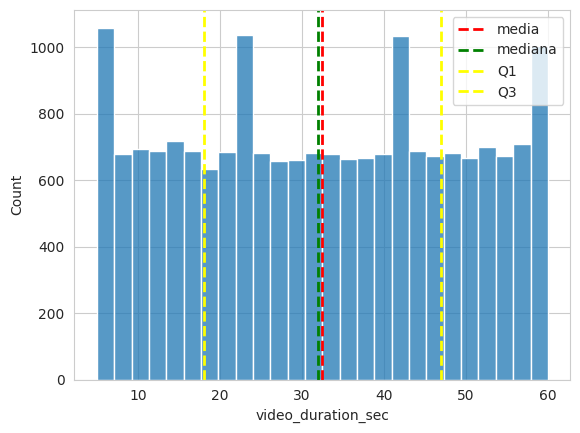

In [25]:
sns.histplot(
    data=df_tiktok,
    x='video_duration_sec'
)
plt.axvline(
    x=df_tiktok.video_duration_sec.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="media"
)
plt.axvline(
    x=df_tiktok.video_duration_sec.median(),
    color='green',
    linestyle='dashed',
    linewidth=2,
    label="mediana"
)

plt.axvline(
    x=df_tiktok.video_duration_sec.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=df_tiktok.video_duration_sec.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label="Q3"
)
plt.legend()
plt.show()


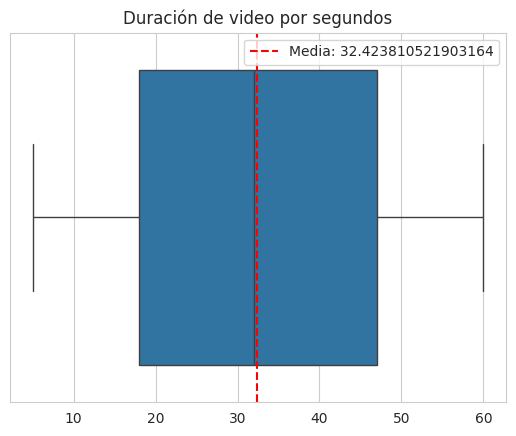

In [26]:
sns.boxplot(x=df_tiktok.video_duration_sec)
plt.title("Duración de video por segundos")
tmp_mean = df_tiktok.video_duration_sec.mean()
plt.axvline(tmp_mean, linestyle="dashed", color="red", label=f"Media: {tmp_mean}")
plt.xlabel('')
plt.legend()
plt.show()

### CONTEOS Y PROPORCIONES

In [27]:
df_tiktok.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [28]:
df_tiktok.describe(include=object)

,claim_status,video_transcription_text,verified_status,author_ban_status
count,19084,19084,19084,19084
unique,2,19012,2,3
top,claim,a friend read in the media a claim that badmi...,not verified,active
freq,9608,2,17884,15383


In [29]:
df_tiktok.claim_status.unique()

array(['claim', 'opinion'], dtype=object)

ANALIZAMOS LA VARIABLE CATEGORICA claim_status

#### CONTEO DE DATOS

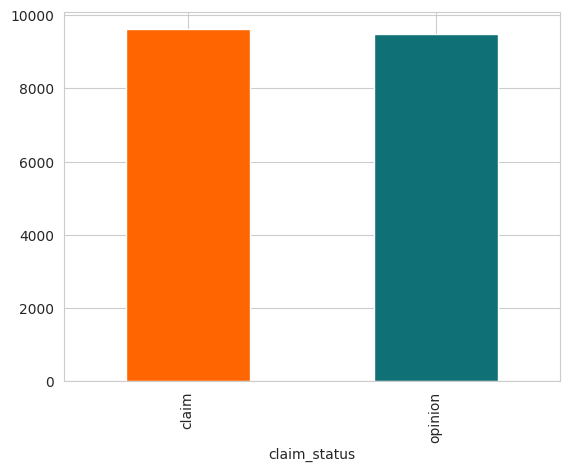

In [30]:
(
    df_tiktok
    .claim_status
    .value_counts()
    .plot(
        kind='bar',
        color=claim_color.values()
    )
)
plt.show()

#### PROPORCION DE DATOS

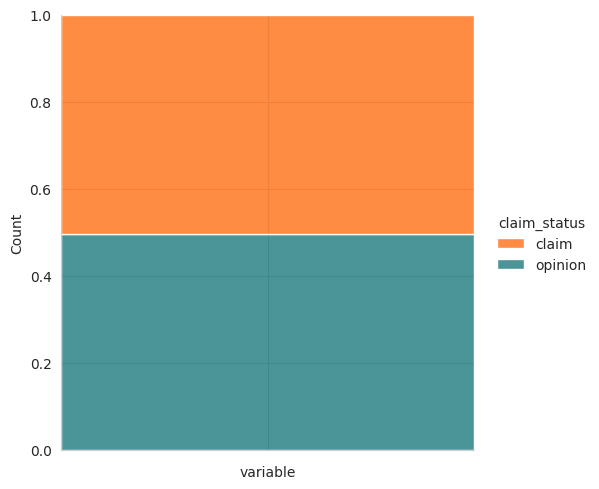

In [31]:
df_tiktok['variable'] = ''
(
    df_tiktok
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='claim_status',
                multiple='fill',
                palette=claim_color
            )
        )
    )
)
plt.show()

## ANÁLISIS BIVARIADO

In [32]:
df_tiktok.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,variable
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,


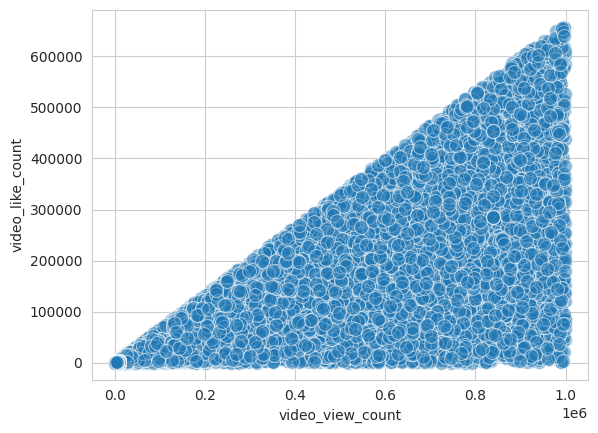

In [33]:
sns.scatterplot(
    data=df_tiktok,
    x='video_view_count',
    y='video_like_count',
    alpha=1/2,
    s=100
)
plt.show()

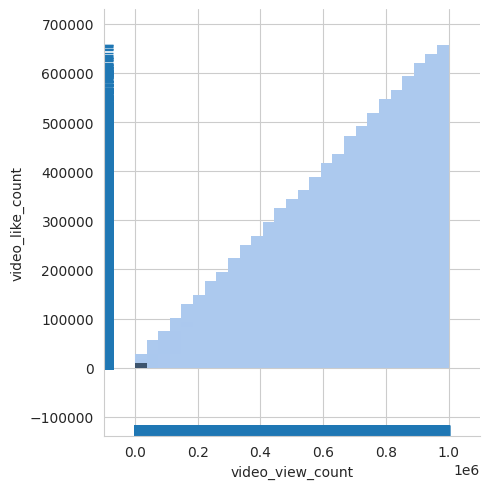

In [34]:
sns.displot(
    data=df_tiktok,
    x='video_view_count',
    y='video_like_count',
    rug=True
)
plt.show()

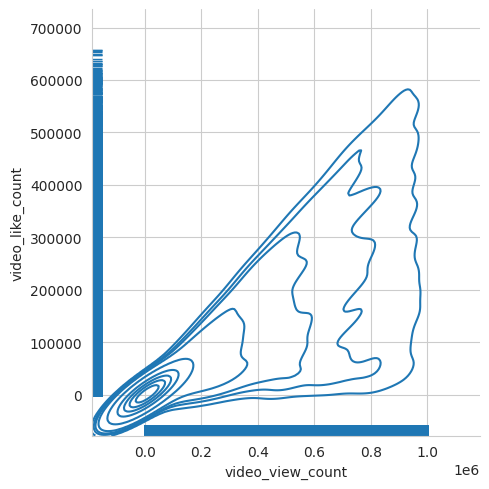

In [35]:
sns.displot(
    data=df_tiktok,
    x='video_view_count',
    y='video_like_count',
    kind='kde',
    rug=True
)
plt.show()

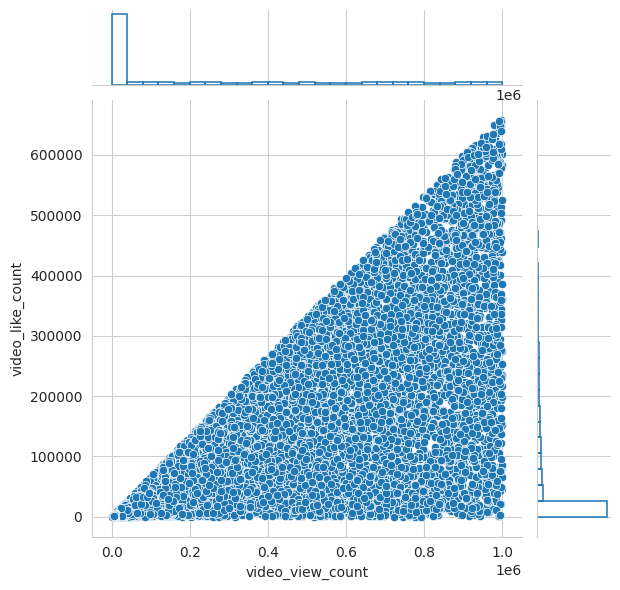

In [36]:
sns.jointplot(
    data=df_tiktok,
     x='video_view_count',
    y='video_like_count',
    marginal_kws=dict(bins=25,fill=False)
)
plt.show()

RELACIONES ENTRE VARIABLES CATEGÓRICAS Y NUMÉRICAS (VIOLIN Y BOXPLOTS)

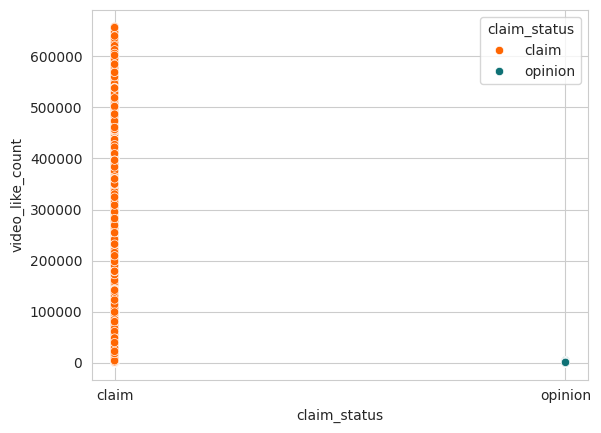

In [37]:
sns.scatterplot(
    data=df_tiktok,
    x='claim_status',
    y='video_like_count',
    hue='claim_status',
    palette=claim_color
)
plt.show()

GENERAMOS RUIDO EN LOS VALORES

<ipython-input-38-be4445c5ad06>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


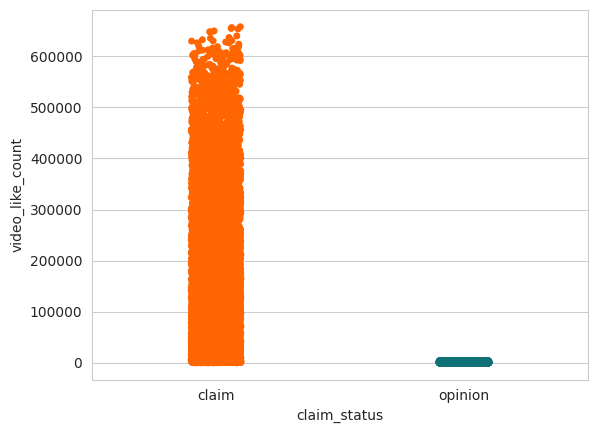

In [38]:
sns.stripplot(
    data=df_tiktok,
    x='claim_status',
    y='video_like_count',
    palette=claim_color
)
plt.show()

<ipython-input-39-4cc148a40299>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


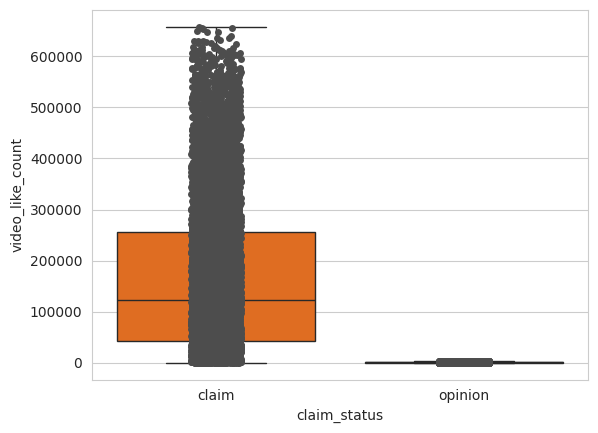

In [39]:
ax = sns.boxplot(
    data=df_tiktok,
    x='claim_status',
    y='video_like_count',
    palette=claim_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=df_tiktok,
    x='claim_status',
    y='video_like_count',
    color='.3'
)
plt.show()

<ipython-input-63-d937015b567b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


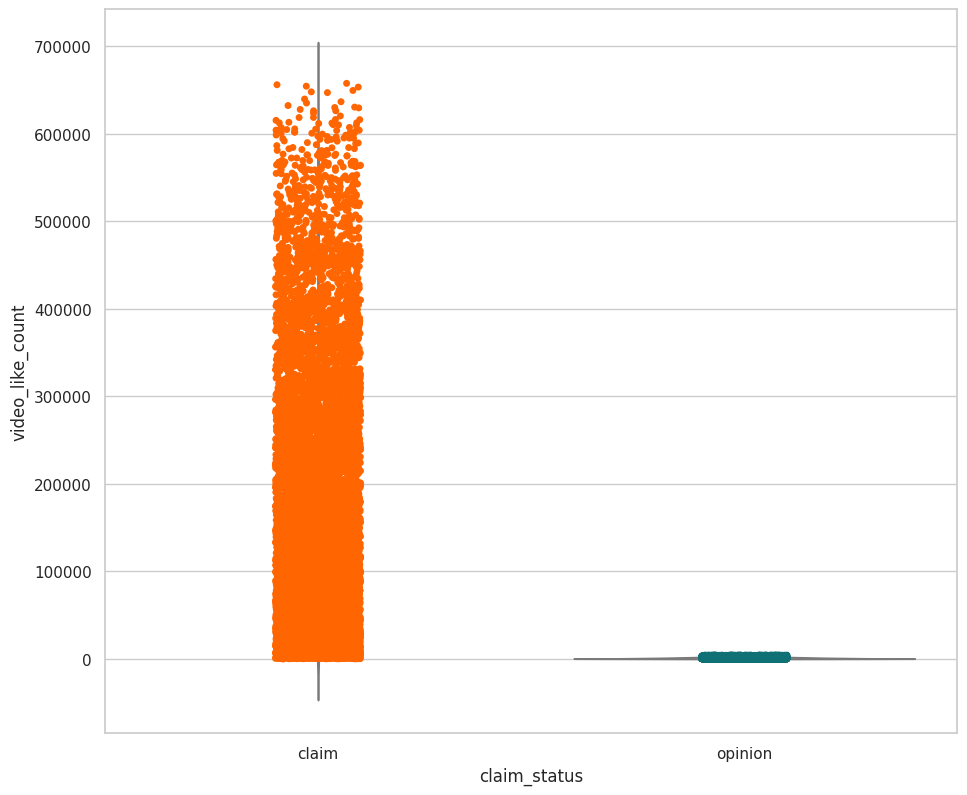

In [ ]:
ax = sns.violinplot(
    data=df_tiktok,
    x='claim_status',
    y='video_like_count',
    color='.8'
)

ax = sns.stripplot(
    data=df_tiktok,
    x='claim_status',
    y='video_like_count',
    palette=claim_color
)
plt.show()